# Table of Contents 
<a class="anchor" id="toc"></a>

* [k nearest neighbors](#knn)
* [Underfitting vs. Overfitting](#overfitting)
* [GridSearch](#GridSearch)


In [6]:
import bamboolib as bam
import pyforest

<a class="anchor" id="knn"></a>

<h1 style="
    background-color:Black; 
    color:White;
    font-size: 40px;
    padding: 4px;
    border-style: solid;
    border-width: 4px 4px;
    border-color: black">
    kNN (k - nearest neighbors)
</h1>

[Back to TOC](#toc)

<a class="anchor" id="overfitting"></a>

<h1 style="
    background-color:Blue; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: Blue">
    Underfitting vs. Overfitting: finding the sweet spot.
</h1>

[Back to TOC](#toc)

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. 
In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called **underfitting**. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will **overfit** the training data, i.e. it learns the noise of the training data. 

We evaluate quantitatively **overfitting / underfitting** by using cross-validation. 
We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png" alt="underfitting_overfitting" style="width: 100%"/>


# Plot overfitting or underfitting.

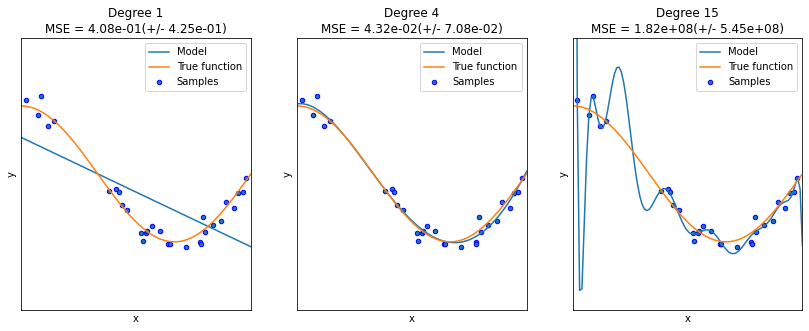

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

<a class="anchor" id="GridSearch"></a>

<h1 style="
    background-color:Blue; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: Blue">
    GridSearch with cross validation.
</h1>

[Back to TOC](#toc)

In [7]:
import pandas as pd
df = pd.read_csv(r'/Users/christiandobbert/Documents/GitHub/365DaysOfData-in-AI/datasets/Breast Cancer Wisconsin classifaction.csv', sep=',', decimal='.')
df = df.drop(columns=['Unnamed: 32'])
df

BamboolibModuleWindow(children=(Window(children=(VBox(children=(VBox(children=(Button(description='Read CSV fi…

g = sns.PairGrid(df, hue="diagnosis",diag_sharey=True)

g.map_upper(sns.scatterplot, s=10, alpha=0.7)
g.map_lower(sns.kdeplot, alpha=0.7)
g.map_diag(sns.kdeplot, lw=1)

g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('IRIS - Scatter Matrix')

In [33]:
import seaborn as sns

In [35]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Text(0.5, 0.98, 'IRIS - Scatter Matrix')

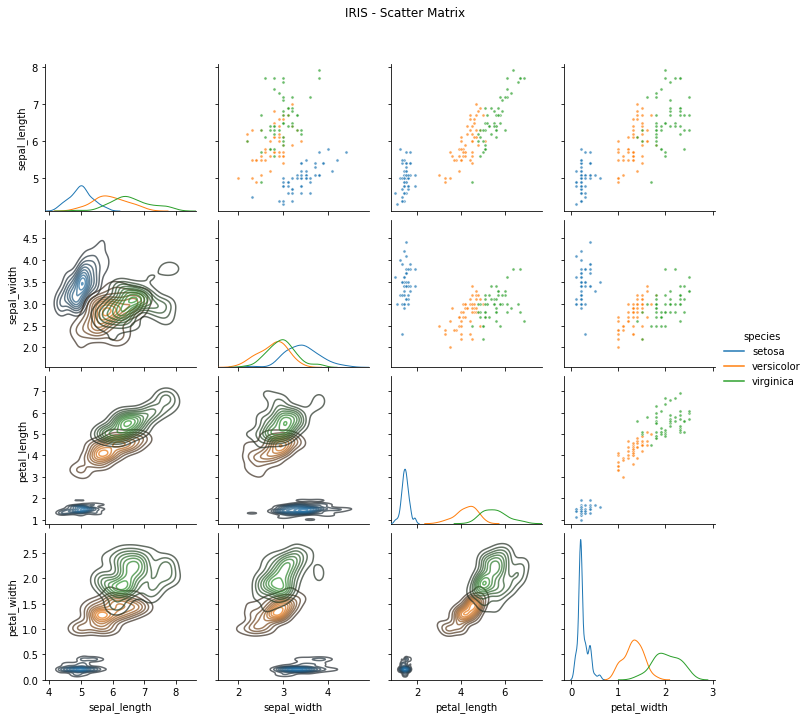

In [49]:
g = sns.PairGrid(iris, hue="species",diag_sharey=True)

g.map_upper(sns.scatterplot, s=10, alpha=0.7)
g.map_lower(sns.kdeplot, alpha=0.7)
g.map_diag(sns.kdeplot, lw=1)

g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('IRIS - Scatter Matrix')

In [37]:
#Define the target variable

target = ["species"]

y = iris[target]
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [48]:
#Define the features

X = iris.copy()
X = X.drop(columns=['species'])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Cross validation score

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y)
cross_val_scores = [ ]

neighbors = range(1,20)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))

print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_score)]
print("best n_neighbors:", best_n_neighbors)
      
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

<IPython.core.display.Javascript object>

best cross-validation score: 0.784
best n_neighbors: 1
test-set score: 0.846


# GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

param_grid = {"n_neighbors": np.arange(1, 15, 1)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,cv=10,return_train_score=True)

grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))
      
      

<IPython.core.display.Javascript object>

best mean cross-validation score: 0.983
best parameters: {'n_neighbors': 4}
test-set score: 0.947


In [31]:
results = pd.DataFrame(grid.cv_results_)
results.columns

<IPython.core.display.Javascript object>

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [45]:
results.params

0      {'n_neighbors': 1}
1      {'n_neighbors': 2}
2      {'n_neighbors': 3}
3      {'n_neighbors': 4}
4      {'n_neighbors': 5}
5      {'n_neighbors': 6}
6      {'n_neighbors': 7}
7      {'n_neighbors': 8}
8      {'n_neighbors': 9}
9     {'n_neighbors': 10}
10    {'n_neighbors': 11}
11    {'n_neighbors': 12}
12    {'n_neighbors': 13}
13    {'n_neighbors': 14}
Name: params, dtype: object